In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\mja04\AppData\Local\Temp\ipykernel_5892\984135291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
cancer = pd.read_csv('C:/Users/mja04/OneDrive/Data Mining ll/Project 4 Breast Cancer/breast-cancer.csv')
display(cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = cancer.drop('diagnosis', axis=1)  # Features
y_label = cancer['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters for GridSearch with KNN
parameters_knn = {'n_neighbors': [1, 5, 7, 11]}

# Create KNN classifier
knn = KNeighborsClassifier()

# GridSearch for best KNN parameters
grid_search_knn = GridSearchCV(knn, parameters_knn)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

print("Best KNN estimator:", best_knn)

# Define parameters for AdaBoost
parameters_adaboost = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Create AdaBoost classifier
adaboost = AdaBoostClassifier()

# GridSearch for best AdaBoost parameters
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Predictions on test set
y_pred_adaboost = grid_search_adaboost.predict(X_test)

print("Best AdaBoost params:", grid_search_adaboost.best_params_)


Best KNN estimator: KNeighborsClassifier()
Best AdaBoost params: {'learning_rate': 0.5, 'n_estimators': 25}


Best Gradient Boosting params: {'learning_rate': 0.5, 'n_estimators': 25}
Accuracy: 0.9532163742690059
F1 Score: 0.9534796587428167


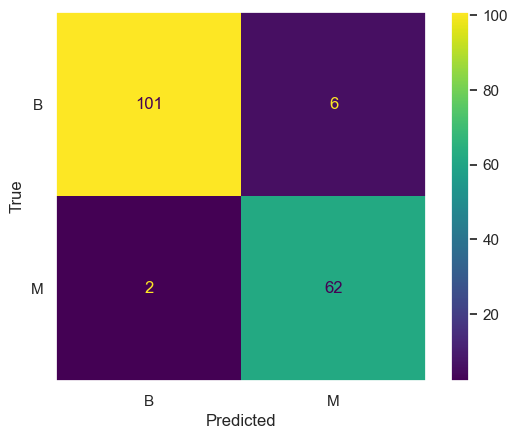

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define parameters for Gradient Boosting
parameters_gb = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Create Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# GridSearch for best Gradient Boosting parameters
grid_search_gb = GridSearchCV(gradient_boosting, parameters_gb)
grid_search_gb.fit(X_train, y_train)

# Predictions on test set
y_pred_gb = grid_search_gb.predict(X_test)

# Print results
print("Best Gradient Boosting params:", grid_search_gb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb, average="weighted"))

# Confusion Matrix
cf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
cmd_gb = ConfusionMatrixDisplay(cf_matrix_gb, display_labels=['B','M'])
cmd_gb.plot()
cmd_gb.ax_.set(xlabel='Predicted', ylabel='True')
cmd_gb.ax_.grid(False)


In [11]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters for GridSearch with Decision Tree
parameters_dt = {'max_depth': [1, 5, 7, 11]}

# Create Decision Tree classifier
dt = DecisionTreeClassifier()

# GridSearch for best Decision Tree parameters
grid_search_dt = GridSearchCV(dt, parameters_dt)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

print("Best Decision Tree params:", grid_search_dt.best_params_)

# Define parameters for AdaBoost
parameters_adaboost = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Create AdaBoost classifier
adaboost = AdaBoostClassifier()

# GridSearch for best AdaBoost parameters
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Predictions on test set
y_pred_adaboost = grid_search_adaboost.predict(X_test)

print("Best AdaBoost params:", grid_search_adaboost.best_params_)


Best Decision Tree params: {'max_depth': 7}
Best AdaBoost params: {'learning_rate': 0.5, 'n_estimators': 25}


Best Decision Tree params: {'max_depth': 7}
Best AdaBoost params: {'learning_rate': 0.5, 'n_estimators': 25}
Accuracy: 0.9532163742690059
F1 Score: 0.9534796587428167


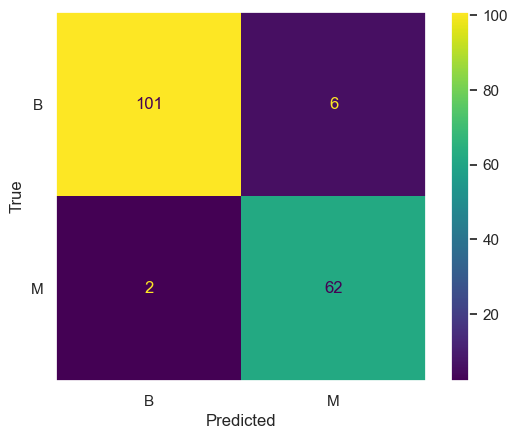

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define Decision Tree parameters for GridSearch
parameters_dt = {'max_depth': [1, 5, 7, 11]}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, parameters_dt)
grid_search_dt.fit(X_train, y_train)

# Get the best Decision Tree estimator
best_dt = grid_search_dt.best_estimator_

# Print the best parameters for Decision Tree
print("Best Decision Tree params:", grid_search_dt.best_params_)

# Define parameters for AdaBoost
parameters_adaboost = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier()

# Perform GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost estimator
best_adaboost = grid_search_adaboost.best_estimator_

# Print the best parameters for AdaBoost
print("Best AdaBoost params:", grid_search_adaboost.best_params_)

# Fit the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Predictions on test set using the best AdaBoost classifier
y_pred_best_adaboost = best_adaboost.predict(X_test)

# Print the accuracy and F1 score of the best AdaBoost classifier
print("Accuracy:", accuracy_score(y_test, y_pred_best_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_best_adaboost, average="weighted"))

# Calculate and plot the confusion matrix for the best AdaBoost classifier
cf_matrix_best_adaboost = confusion_matrix(y_test, y_pred_best_adaboost)
cmd_best_adaboost = ConfusionMatrixDisplay(cf_matrix_best_adaboost, display_labels=['B','M'])
cmd_best_adaboost.plot()
cmd_best_adaboost.ax_.set(xlabel='Predicted', ylabel='True')
cmd_best_adaboost.ax_.grid(False)


Best SVC params: {'C': 3, 'kernel': 'poly'}
Best AdaBoost params: {'learning_rate': 0.5, 'n_estimators': 25}
Accuracy: 0.9532163742690059
F1 Score: 0.9534796587428167


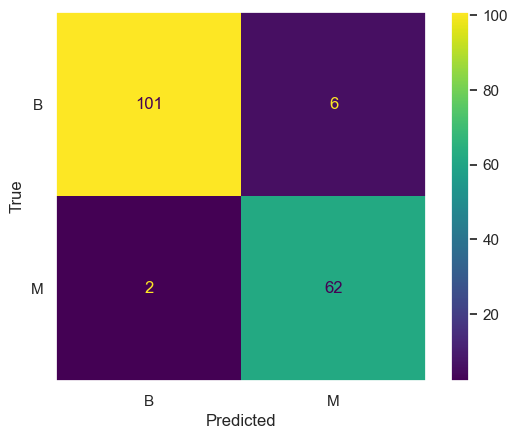

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define parameters for GridSearch with SVC
parameters_svc = {'C': [1, 3, 5, 7], 'kernel': ('linear', 'rbf', 'poly')}

# Create SVC classifier
svc = SVC()

# GridSearch for best SVC parameters
grid_search_svc = GridSearchCV(svc, parameters_svc)
grid_search_svc.fit(X_train, y_train)

# Get the best SVC estimator
best_svc = grid_search_svc.best_estimator_

# Print the best parameters for SVC
print("Best SVC params:", grid_search_svc.best_params_)

# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier()

# GridSearch for best AdaBoost parameters
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost estimator
best_adaboost = grid_search_adaboost.best_estimator_

# Print the best parameters for AdaBoost
print("Best AdaBoost params:", grid_search_adaboost.best_params_)

# Fit the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Predictions on test set using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_adaboost, average="weighted"))

# Calculate and plot the confusion matrix for the best AdaBoost classifier
cf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cmd_adaboost = ConfusionMatrixDisplay(cf_matrix_adaboost, display_labels=['B','M'])
cmd_adaboost.plot()
cmd_adaboost.ax_.set(xlabel='Predicted', ylabel='True')
cmd_adaboost.ax_.grid(False)


In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Create and fit the Support Vector Classifier with grid search
parameters = {'C': [1, 3, 5, 7], 'kernel': ('linear', 'rbf', 'poly')}
svc = SVC()
GSSVC = GridSearchCV(svc, parameters)
GSSVC.fit(X_train, y_train)

# Print best parameters for SVC
print("Best SVC parameters:", GSSVC.best_params_)

# Set the best SVC estimator as the base estimator for AdaBoost
best_svc = GSSVC.best_estimator_
adaboost = AdaBoostClassifier(base_estimator=best_svc)

# Define parameters for AdaBoost grid search
parameters_adaboost = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Perform grid search for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost estimator
best_adaboost = grid_search_adaboost.best_estimator_

# Print best parameters for AdaBoost
print("Best AdaBoost parameters:", grid_search_adaboost.best_params_)

# Fit the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Predictions on test set using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)

# Print results
print("AdaBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_adaboost, average="weighted"))

# Calculate and plot the confusion matrix for the best AdaBoost classifier
cf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cmd_adaboost = ConfusionMatrixDisplay(cf_matrix_adaboost, display_labels=['B','M'])
cmd_adaboost.plot()
cmd_adaboost.ax_.set(xlabel='Predicted', ylabel='True')
cmd_adaboost.ax_.grid(False)


Best SVC parameters: {'C': 3, 'kernel': 'poly'}


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Best AdaBoost params: {'learning_rate': 0.5, 'n_estimators': 25}
Accuracy: 0.9532163742690059
F1 Score: 0.9534796587428167


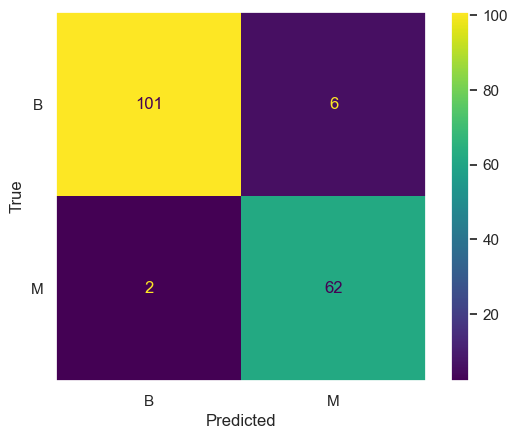

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Define parameters for AdaBoost
parameters_adaboost = {'n_estimators': [5, 10, 25], 'learning_rate': [0.1, 0.5, 1.0]}

# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier()

# GridSearch for best AdaBoost parameters
grid_search_adaboost = GridSearchCV(adaboost, parameters_adaboost)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost estimator
best_adaboost = grid_search_adaboost.best_estimator_

# Print the best parameters for AdaBoost
print("Best AdaBoost params:", grid_search_adaboost.best_params_)

# Fit the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Predictions on test set using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_adaboost, average="weighted"))

# Calculate and plot the confusion matrix for the best AdaBoost classifier
cf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cmd_adaboost = ConfusionMatrixDisplay(cf_matrix_adaboost, display_labels=['B','M'])
cmd_adaboost.plot()
cmd_adaboost.ax_.set(xlabel='Predicted', ylabel='True')
cmd_adaboost.ax_.grid(False)
